Importing vehicle dataset.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

# Read the dataset

vehicle_df = pd.read_csv("vehicle.csv")  
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

Check all the column information. All columns except class are numbers.

In [2]:
# Except for the class which needs to be predicted rest all values are numeric
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

We can see missing values. We need to treat the missing values

In [3]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [4]:
#Fill all the missing values with median
vehicle_df = vehicle_df.fillna(vehicle_df.median())

In [5]:
# All the values are now filled with median and there are 0 missing values.
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

Analysis of the variables using box plot to find the outliers.

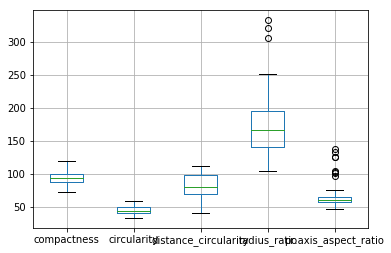

In [6]:
boxplot = vehicle_df.boxplot(column=['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio'])

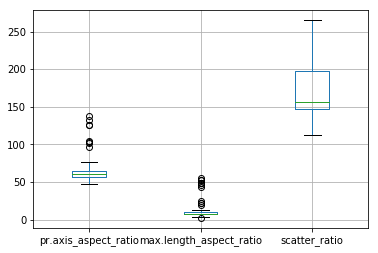

In [7]:
boxplot1 = vehicle_df.boxplot(column=['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio'])

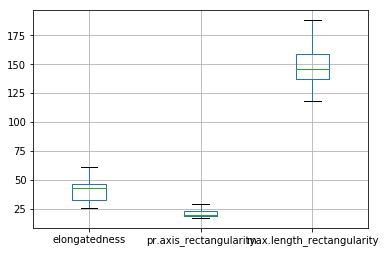

In [8]:
boxplot2 = vehicle_df.boxplot(column=['elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity'])

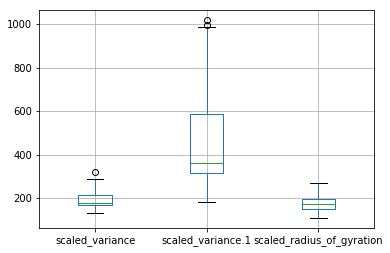

In [9]:
boxplot3 = vehicle_df.boxplot(column=['scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'])

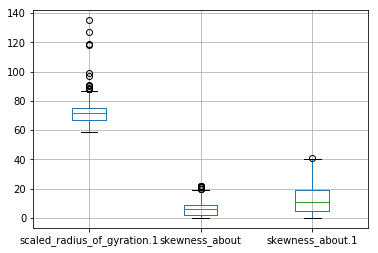

In [10]:
boxplot4 = vehicle_df.boxplot(column=['scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1'])

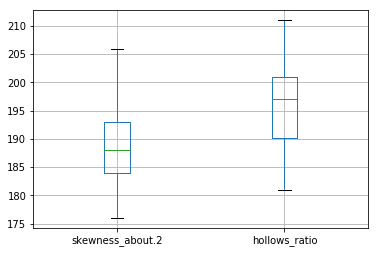

In [11]:
boxplot5 = vehicle_df.boxplot(column=['skewness_about.2', 'hollows_ratio'])

Outliers are observed for radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, 
skewness_about, skewness_about.1

Removal of outliers. Keep all the values where z is less than 3.

In [12]:
vehicle_df.shape

(846, 19)

In [13]:
from scipy import stats
vehicle_df = vehicle_df[(np.abs(stats.zscore(vehicle_df.select_dtypes(exclude='object'))) < 3).all(axis=1)]

In [14]:
vehicle_df.shape

(824, 19)

We can see that 22 rows have been dropped due to outlier removal.

Understanding the attributes - Find relationship between different attributes

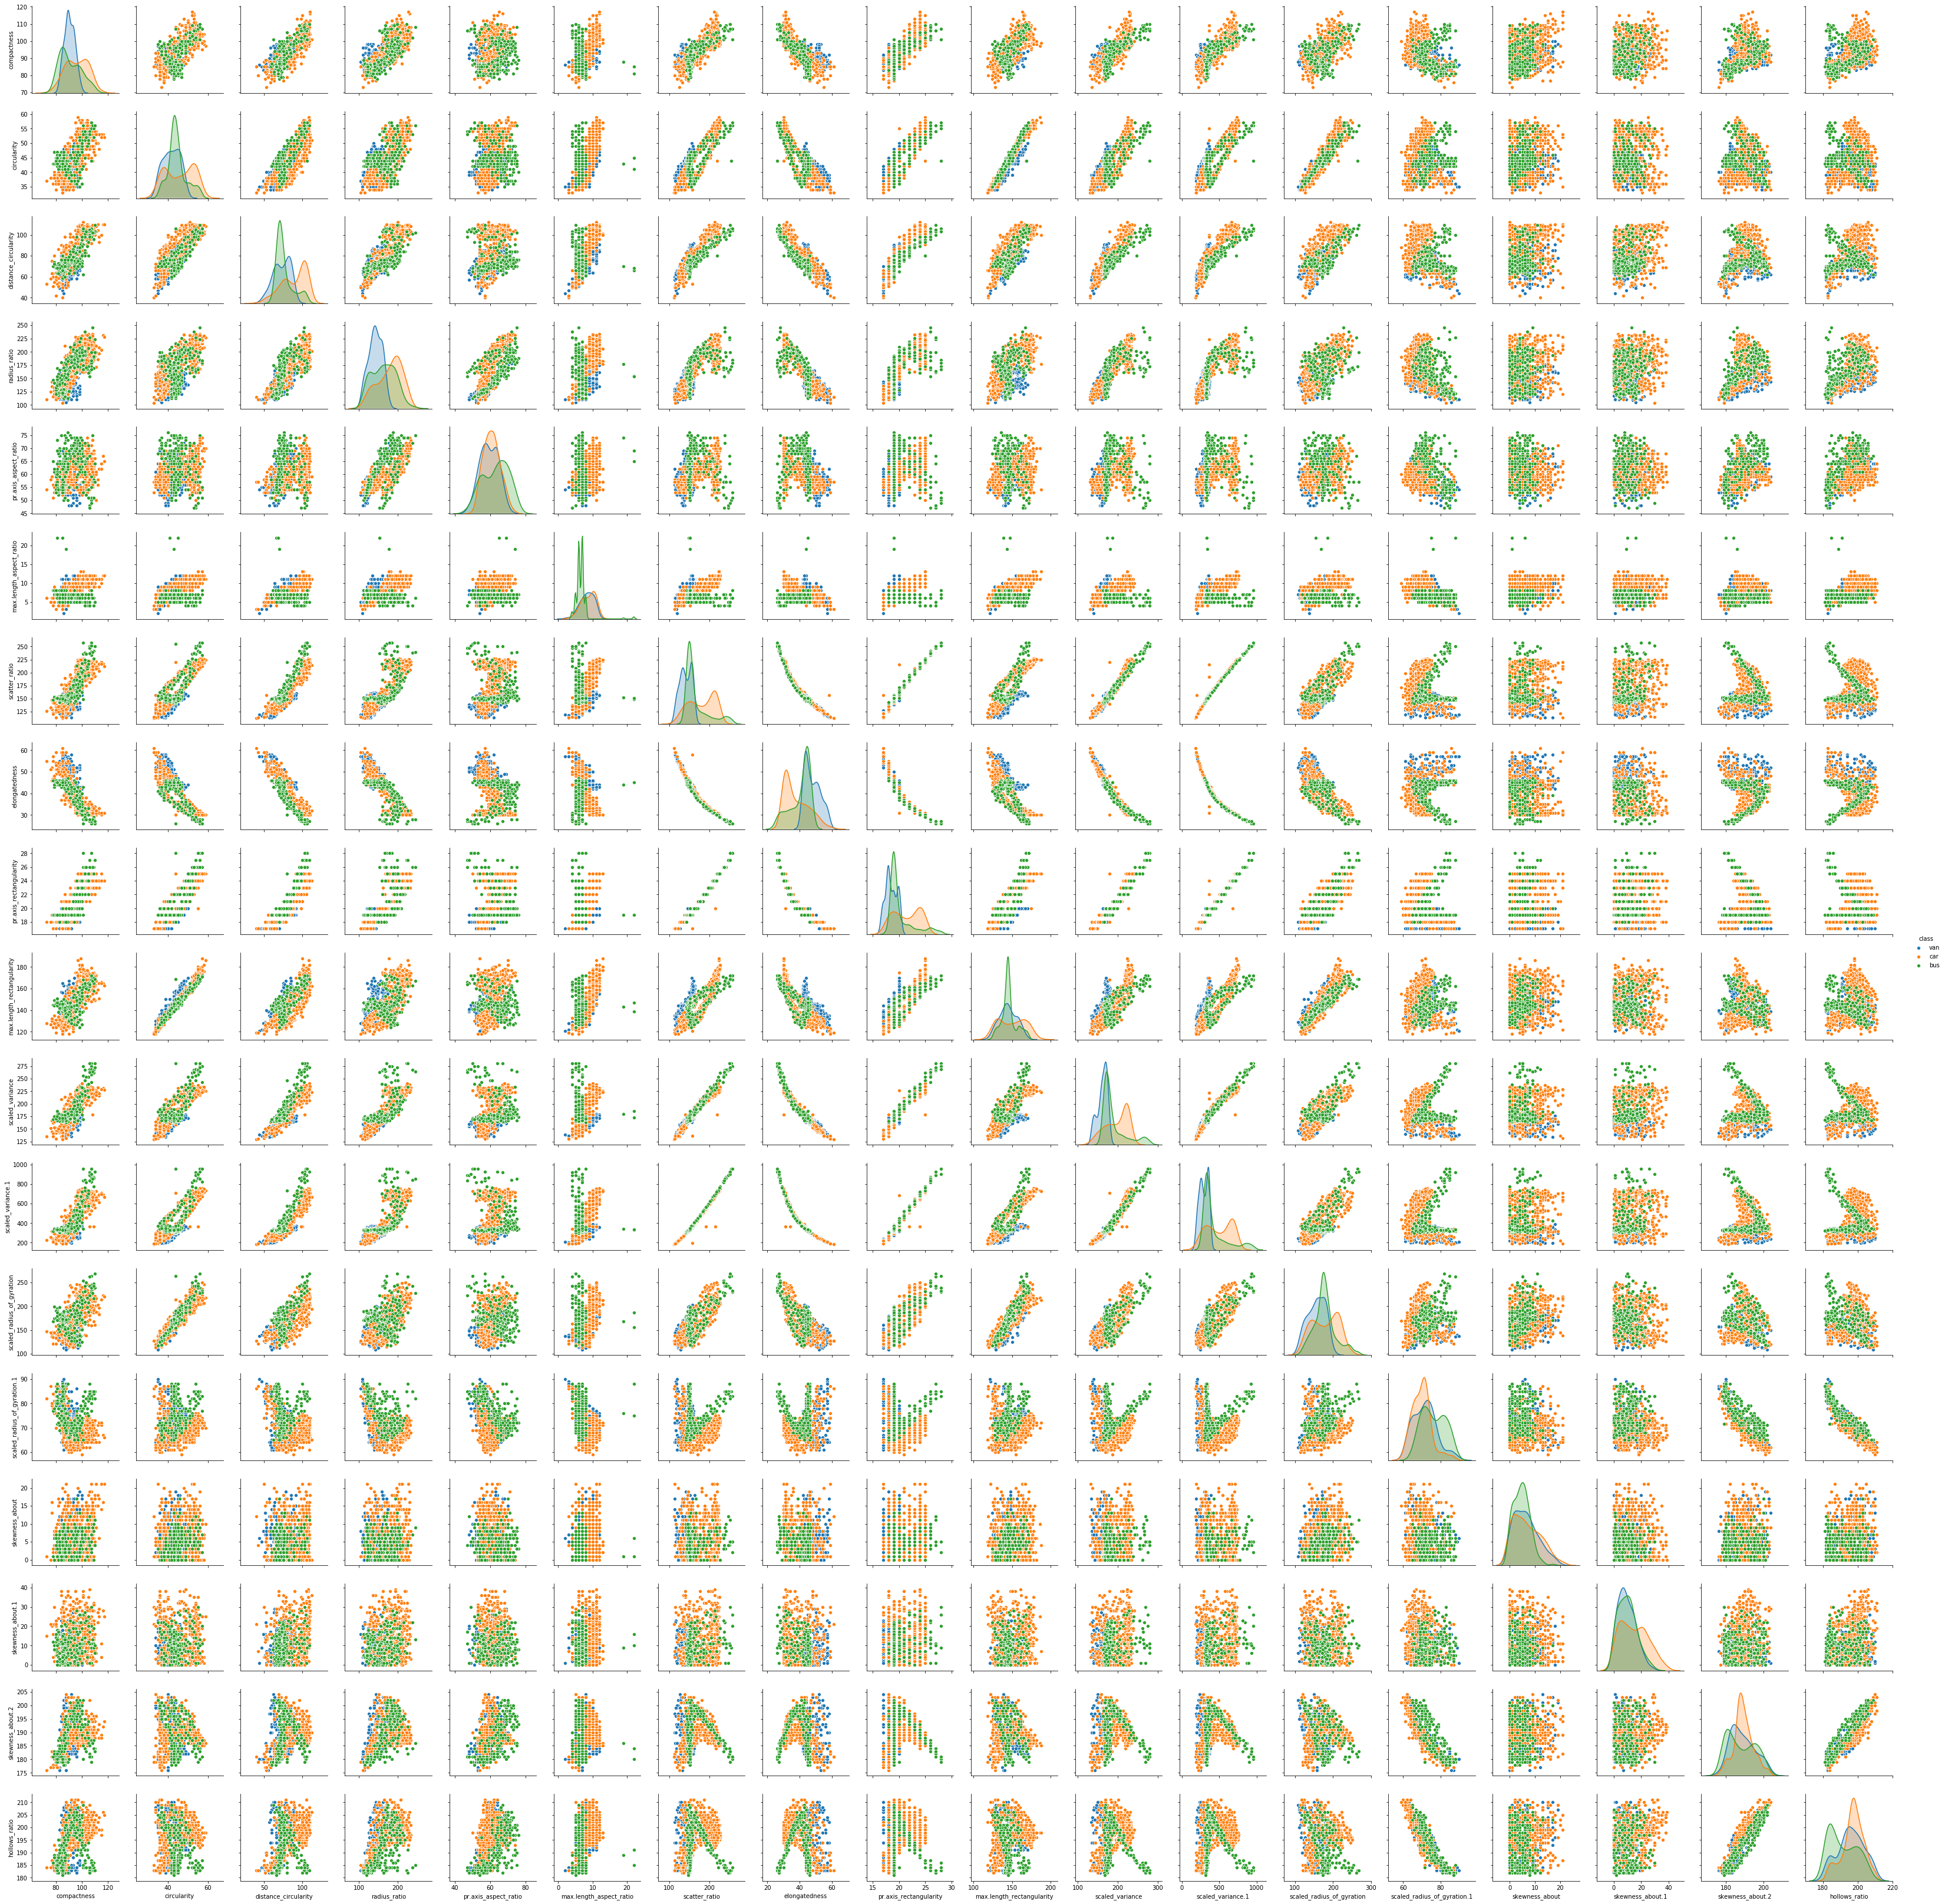

In [15]:
#Visually inspecting the covariance between independent dimensions

sns.pairplot(vehicle_df, diag_kind='kde', hue='class') 

In [16]:
#Correlation analysis using heat map
corr = vehicle_df.corr()
corr.style.background_gradient(cmap='viridis', low=.5, high=0).highlight_null('red')

scaled_radius_of_gyration.1 , elongatedness and skewness_about has very less co relation to other variables.

From the above plots, it seems there is a linear relationship 
between compactness, circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.length_rectangularity, scaled_variance,
scaled_variance.1, scaled_radius_of_gyration.

KMeans clustering. Find the elbox plot and clusters.

In [17]:
vehicle_df1 = vehicle_df.copy()

In [18]:
#Standardize the data.
vehicle_df['class'] = vehicle_df['class'].astype('category')
vehicle_df['class'] = vehicle_df['class'].cat.codes
vehicle_df['class'].head()

0    2
1    2
2    1
3    2
5    0
Name: class, dtype: int8

In [19]:
from scipy.stats import zscore
vehicle_std = vehicle_df.apply(zscore)
vehicle_std.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.179512     0.532942              0.068123      0.325781   
1    -0.315197    -0.615790              0.131911     -0.836448   
2     1.292608     0.861151              1.535251      1.299541   
3    -0.067842    -0.615790              0.004335     -0.271039   
5     1.663639    -0.123477              1.535251      0.137311   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.918924                 0.828137      -0.195927   
1             -0.746308                 0.377420      -0.596304   
2              0.852831                 0.828137       1.189991   
3              0.319785                 0.377420      -0.750295   
5             -1.990083                -0.974729       2.668304   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.127089               -0.212374                   0.774827   
1       0.513989               -0.609189                  -0.331685   
2      -1.162579                0.978074                   0.705670   
3       0.642955               -0.609189                  -0.331685   
5      -1.936379                2.962154                   1.466398   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.381088          -0.333611                   0.309709   
1        -0.582101          -0.619626                  -0.504527   
2         1.193517           1.160671                   1.437112   
3        -0.917124          -0.742204                  -1.475346   
5         3.103145           3.040198                   2.815050   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.326917       -0.057786          0.395248   
1                    -0.008501        0.568735          0.168290   
2                     0.150706        1.612936         -0.399104   
3                    -1.441371       -0.057786         -0.285625   
5                     2.061199       -0.266626         -0.399104   

   skewness_about.2  hollows_ratio     class  
0         -0.319682       0.180699  1.463686  
1          0.006734       0.452406  1.463686  
2         -0.156474       0.044845  0.031290  
3          1.638814       1.539235  1.463686  
5         -1.298929      -1.721252 -1.401106

In [20]:
vehicle_std['class'].value_counts()

 0.031290    422
-1.401106    210
 1.463686    192
Name: class, dtype: int64

In [21]:
#Assign a dummy array
distortion=[]

In [22]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [23]:
#Iterating values of k from 1 to 10 fit K means model Using c distance - Get the measure for Sum of squares error
cluster_range = range( 1, 11)  
distortion=[]
cluster_sil_scores = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(vehicle_std)
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    distortion.append(clusters.inertia_ )        # capture the intertia
    
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "Distortion": distortion } )
clusters_df

num_clusters    Distortion
0             1  15656.000000
1             2   9317.487873
2             3   7465.355302
3             4   6731.490016
4             5   6141.924628
5             6   5689.539027
6             7   5207.799791
7             8   4881.550803
8             9   4670.503705
9            10   4431.883094

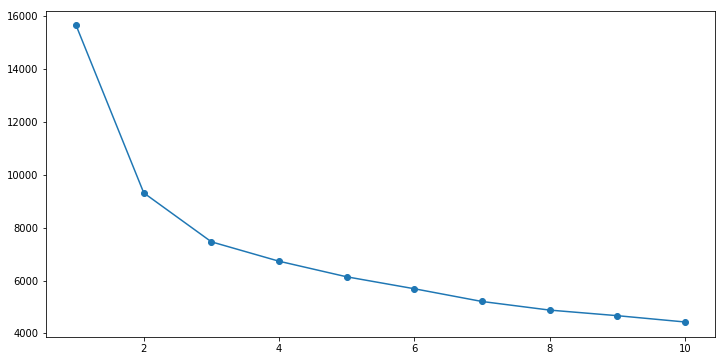

In [24]:
# Elbow plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.Distortion, marker = "o" )
plt.show()

Looking at the above plot we can say that the optimal value of k is 4

In [25]:
# Number of clusters

kmeans = KMeans(n_clusters=4)

# Fitting the input data

kmeans = kmeans.fit(vehicle_std)

In [26]:
kmeans.cluster_centers_

array([[-0.09676195, -0.47046401, -0.12927095,  0.41079551,  0.63713727,
        -0.36256194, -0.12253261, -0.1115961 , -0.19263149, -0.54569359,
        -0.01656361, -0.14810339, -0.47944209, -0.58394622, -0.21467581,
         0.18184004,  0.83738982,  0.60988791, -0.61720746],
       [ 1.20485315,  1.23974876,  1.26157089,  1.05893567,  0.20329598,
         0.71592529,  1.36059514, -1.24926981,  1.36995052,  1.16910867,
         1.3005576 ,  1.37153125,  1.15864011, -0.06663532,  0.18051727,
         0.26575976, -0.0291579 ,  0.19366382, -0.18862121],
       [-0.35769116, -0.40119216, -0.40979733, -0.58724959, -0.17316928,
         0.236427  , -0.74634616,  0.74149916, -0.70686727, -0.18485951,
        -0.7606082 , -0.73699523, -0.48798499, -0.45877349,  0.06323434,
        -0.29610028,  0.32812847,  0.42314504,  1.17720695],
       [-1.07577905, -0.6737097 , -1.05959702, -1.19390228, -0.76626156,
        -0.77949899, -0.84351268,  0.95675136, -0.82139053, -0.72739665,
        -0.865

In [27]:
#Store the centroids in a dataframe with column names from the original dataset given
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns = vehicle_std.columns)
centroids_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.096762    -0.470464             -0.129271      0.410796   
1     1.204853     1.239749              1.261571      1.058936   
2    -0.357691    -0.401192             -0.409797     -0.587250   
3    -1.075779    -0.673710             -1.059597     -1.193902   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.637137                -0.362562      -0.122533   
1              0.203296                 0.715925       1.360595   
2             -0.173169                 0.236427      -0.746346   
3             -0.766262                -0.779499      -0.843513   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.111596               -0.192631                  -0.545694   
1      -1.249270                1.369951                   1.169109   
2       0.741499               -0.706867                  -0.184860   
3       0.956751               -0.821391                  -0.727397   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.016564          -0.148103                  -0.479442   
1         1.300558           1.371531                   1.158640   
2        -0.760608          -0.736995                  -0.487985   
3        -0.865168          -0.839873                  -0.469023   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.583946       -0.214676          0.181840   
1                    -0.066635        0.180517          0.265760   
2                    -0.458773        0.063234         -0.296100   
3                     1.191942       -0.067837         -0.229189   

   skewness_about.2  hollows_ratio     class  
0          0.837390       0.609888 -0.617207  
1         -0.029158       0.193664 -0.188621  
2          0.328128       0.423145  1.177207  
3         -1.204670      -1.346384 -0.321064

In [28]:
#Use kmeans.labels_ function to print out the labels of the classes
labels = kmeans.labels_
labels

array([2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 3, 0, 1, 1, 3, 3, 0,
       0, 1, 2, 3, 1, 0, 3, 2, 2, 2, 1, 0, 2, 3, 1, 3, 1, 3, 2, 0, 2, 2,
       3, 2, 0, 3, 0, 1, 0, 1, 2, 0, 2, 1, 3, 1, 3, 3, 3, 0, 3, 3, 1, 2,
       1, 1, 1, 0, 3, 2, 1, 0, 3, 1, 3, 3, 1, 2, 3, 0, 2, 3, 0, 3, 1, 0,
       1, 2, 3, 1, 3, 3, 1, 3, 2, 2, 2, 0, 1, 1, 3, 3, 0, 2, 2, 3, 3, 2,
       2, 1, 1, 3, 0, 3, 2, 2, 2, 2, 3, 2, 2, 1, 1, 0, 3, 1, 2, 2, 3, 2,
       0, 3, 1, 3, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 3, 1,
       0, 2, 1, 1, 0, 1, 3, 3, 1, 1, 2, 1, 2, 0, 0, 0, 0, 3, 1, 3, 0, 3,
       1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 3, 1, 3, 3, 3, 2, 0, 1, 1, 2, 2,
       0, 3, 3, 1, 0, 2, 0, 1, 3, 0, 3, 1, 3, 2, 1, 2, 0, 3, 3, 2, 1, 2,
       1, 3, 3, 3, 3, 1, 2, 2, 0, 3, 1, 3, 0, 0, 3, 1, 2, 3, 0, 0, 1, 3,
       3, 1, 2, 0, 2, 1, 0, 2, 1, 1, 3, 0, 2, 2, 1, 3, 3, 0, 2, 3, 3, 0,
       2, 2, 1, 0, 3, 3, 1, 0, 0, 3, 3, 1, 2, 0, 0, 2, 1, 3, 2, 0, 2, 1,
       0, 1, 3, 0, 0, 1, 2, 0, 2, 3, 0, 1, 1, 1, 1,

Use PCA from scikit learn to find out reduced number of dimension which covers more than 95% of the variance

In [29]:
X = vehicle_df1[vehicle_df1.columns[0:-1]]
y = vehicle_df1["class"]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test_O, y_train, y_test_O = train_test_split(X, y, test_size=0.30, random_state=1)


print(X_train.shape)
print(X_test_O.shape)
print(y_test_O.shape)

(576, 18)
(248, 18)
(248,)


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Create a covariance matrix for identifying Principal components

In [32]:
# PCA
# Step 1 - Create covariance matrix
X_train_std =  sc.fit_transform(X_train)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00173913e+00  6.84039329e-01  7.86518377e-01  7.60826351e-01
   2.21089558e-01  4.55760313e-01  8.06508662e-01 -7.89322167e-01
   8.06762416e-01  6.69020550e-01  7.88204769e-01  8.09649149e-01
   5.82467119e-01 -2.93812356e-01  2.16317961e-01  2.05821804e-01
   3.32606678e-01  4.00801952e-01]
 [ 6.84039329e-01  1.00173913e+00  7.88660866e-01  6.39611956e-01
   1.79159540e-01  5.51492967e-01  8.53467442e-01 -8.22744923e-01
   8.47155518e-01  9.60775026e-01  8.10759206e-01  8.40878020e-01
   9.26467335e-01  2.29942749e-02  1.44604276e-01  4.35086757e-02
  -8.14481460e-02  7.40795415e-02]
 [ 7.86518377e-01  7.88660866e-01  1.00173913e+00  8.10975705e-01
   2.40868173e-01  6.29249233e-01  9.04792490e-01 -9.06511161e-01
   8.93200424e-01  7.62728040e-01  8.83006046e-01  8.87267141e-01
   7.06788054e-01 -2.81500523e-01  1.18099185e-01  3.29874506e-01
   1.61653985e-01  3.55722447e-01]
 [ 7.60826351e-01  6.39611956e-01  8.10975705e-01  1.00173913e+00
   6.59511580e-

C:\Users\ananth.ranganatha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ananth.ranganatha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Identify eigen values and eigen vector

In [33]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.72527081e-01  9.14985478e-02  3.54260112e-02  8.94681358e-02
   1.70401685e-01  2.29035736e-01 -2.51856907e-01  7.63427262e-01
   3.60404671e-01  1.32468226e-01  2.61474784e-02  2.13005834e-02
  -7.22831813e-03  8.16938460e-02  1.49689998e-01 -1.72379776e-02
  -4.69787173e-02 -1.16674224e-02]
 [ 2.84862624e-01 -1.36185393e-01  2.12873250e-01 -1.84540709e-02
  -1.50443381e-01 -3.01449772e-02  3.81814694e-01  8.41965894e-02
   4.05646084e-02 -2.05957751e-01 -5.26171672e-02  1.95299120e-01
  -1.74568946e-02  1.78400583e-01 -2.86241041e-01  9.90526235e-02
  -6.53016280e-01 -2.07258943e-01]
 [ 3.00982986e-01  3.81891823e-02 -7.39499132e-02  1.21050956e-01
  -5.37069715e-02 -8.29131233e-03 -1.35276449e-01 -3.11349767e-01
   3.65922090e-01 -2.94345392e-02  7.66898276e-01 -5.01134691e-02
   3.28990526e-03 -1.19260994e-01 -1.19587505e-01 -1.52180665e-02
   1.45848656e-03 -1.24333165e-01]
 [ 2.73626086e-01  2.04393169e-01 -6.64514058e-02 -2.51502238e-01
   8.16042466e-02 -

In [34]:
# Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(9.823229290486909, array([ 0.27252708,  0.28486262,  0.30098299,  0.27362609,  0.09687758,
        0.18641458,  0.30953357, -0.30799237,  0.30601862,  0.27299913,
        0.30184912,  0.30580315,  0.26063606, -0.06030096,  0.04290238,
        0.08015195,  0.04865451,  0.09649011])), (3.3704403880550164, array([ 0.09149855, -0.13618539,  0.03818918,  0.20439317,  0.27567942,
        0.07783161, -0.08574024,  0.02529038, -0.0981183 , -0.13049396,
       -0.08032951, -0.08988484, -0.20620357, -0.49787974,  0.05563199,
        0.07159407,  0.50083519,  0.4991493 ])), (1.211479566466099, array([ 0.03542601,  0.21287325, -0.07394991, -0.06645141,  0.04107539,
        0.12303539, -0.09977877,  0.0877403 , -0.10123354,  0.22814177,
       -0.13122131, -0.09902052,  0.22741868, -0.05443494,  0.56707948,
       -0.6622364 ,  0.06384446,  0.02916886])), (1.0779046025339911, array([ 0.08946814, -0.01845407,  0.12105096, -0.25150224, -0.61139556,
        0.35304947, -0.01921774,  0.08757593,  0.0

Find variance and cumulative variance by each eigen vector

In [35]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [0.5447875  0.73170911 0.79889668 0.85867631 0.9102781  0.94661209
 0.96380432 0.97670958 0.98296682 0.98782848 0.99132971 0.99398365
 0.99574291 0.99723575 0.99832148 0.99932144 0.99990038 1.        ]


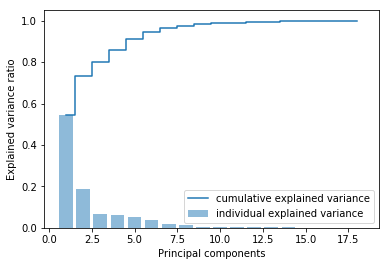

In [36]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

Use PCA command from sklearn and find Principal Components. Transform data to components formed
We will reduce from 18 dimansion to 8 dimension which covers more than 95% of the variance

In [37]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(train_eigvectors_sorted[0:8])   # Reducing from 18 to 8 dimension space as 95% of explained variance ratio

X_std_8D = np.dot(X_train_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

In [38]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=8, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [39]:
pca1 = pca.fit_transform(X_train)

In [40]:
pca1_df = pd.DataFrame(data=pca1, columns = [0,1,2,3,4,5,6,7])

In [41]:
pca1_df.head(5)

0         1         2         3         4         5         6  \
0  0.987554 -1.161212  0.614329  0.463067  3.082856  0.837517 -0.836289   
1 -0.392079 -0.153864  1.508074 -0.580010 -0.665555  0.556639 -0.876064   
2 -0.259614 -1.960424 -0.703249  1.434939 -0.321097  0.651551  0.283635   
3 -0.701501 -0.401062  1.565554  0.158520 -0.687740  0.946435 -1.793571   
4 -0.641308  0.894713  1.086060  1.721294 -0.276083  0.425379  0.948568   

          7  
0 -0.736036  
1 -0.440269  
2 -0.222834  
3  0.915883  
4 -0.796875

Find correlation between components and features

In [42]:
pca1_df.corr()

0             1             2             3             4  \
0  1.000000e+00 -1.018509e-17 -9.905120e-17 -9.383798e-17  1.520523e-16   
1 -1.018509e-17  1.000000e+00 -8.534236e-17 -1.917307e-16 -3.820615e-17   
2 -9.905120e-17 -8.534236e-17  1.000000e+00  1.436532e-16 -3.861645e-18   
3 -9.383798e-17 -1.917307e-16  1.436532e-16  1.000000e+00  2.761076e-17   
4  1.520523e-16 -3.820615e-17 -3.861645e-18  2.761076e-17  1.000000e+00   
5 -5.145642e-17 -2.616265e-17 -1.316821e-16  8.611469e-17  2.693498e-17   
6 -1.253104e-16 -1.156080e-16  9.190716e-17  5.946934e-17  2.367189e-16   
7  2.017710e-17  4.580877e-17  7.452975e-17  1.509903e-16 -1.887379e-17   

              5             6             7  
0 -5.145642e-17 -1.253104e-16  2.017710e-17  
1 -2.616265e-17 -1.156080e-16  4.580877e-17  
2 -1.316821e-16  9.190716e-17  7.452975e-17  
3  8.611469e-17  5.946934e-17  1.509903e-16  
4  2.693498e-17  2.367189e-16 -1.887379e-17  
5  1.000000e+00  4.813541e-16  8.399079e-18  
6  4.813541e-16  1.000000e+00 -6.410331e-17  
7  8.399079e-18 -6.410331e-17  1.000000e+00

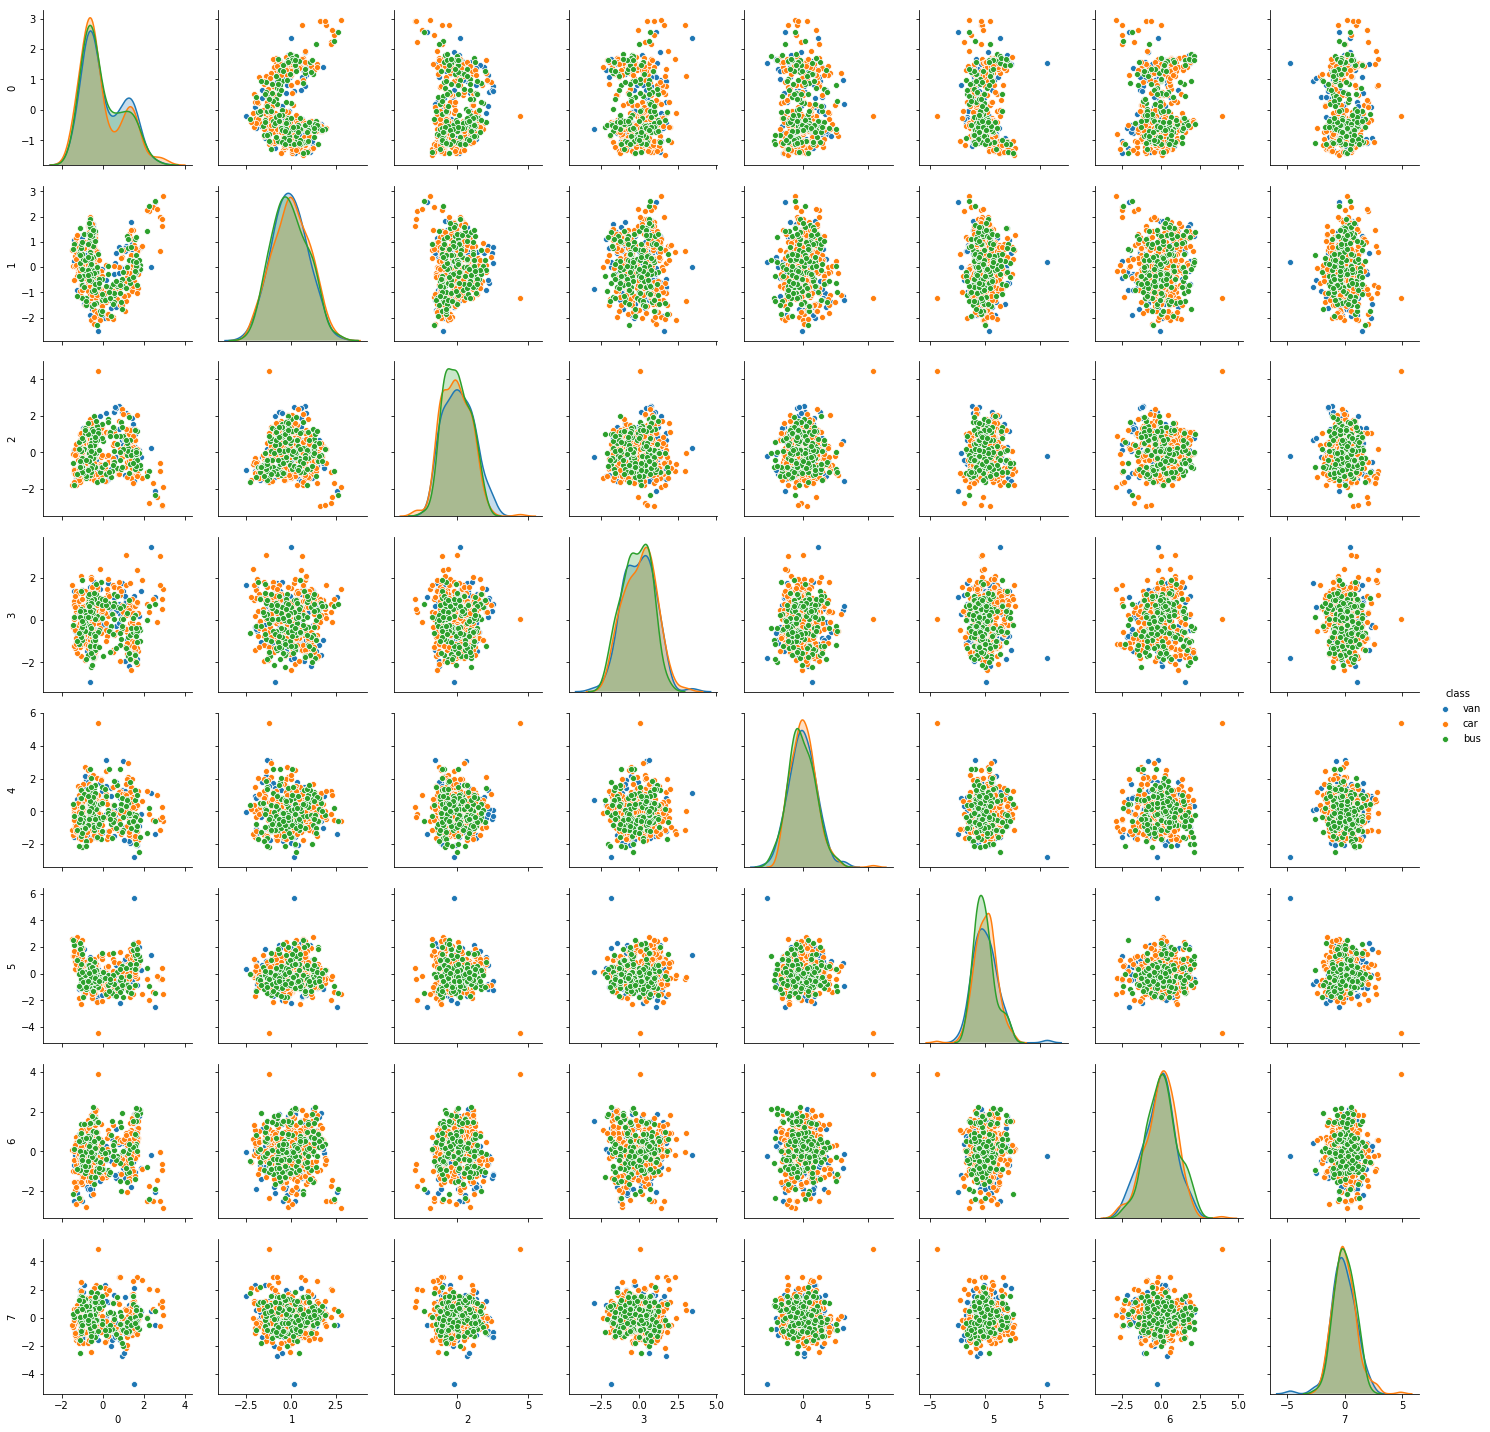

In [43]:
#Let us check it visually
Proj_data_mpg_df = pca1_df.join(y)
sns.pairplot(Proj_data_mpg_df, diag_kind='kde', hue ='class')

#Let us check it visually
Proj_data_mpg_df = pca1_df.join(y)
sns.pairplot(Proj_data_mpg_df, diag_kind='kde', hue ='class')

As seen above the data seems to be in a cirucal fashion compared to the plot observed in the begining.
So PCA has helped in projecting the data.

Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy.

In [44]:
from __future__ import print_function
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [0.01, 0.05, 0.5, 1]},
                    {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}]
scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

clf = GridSearchCV(SVC(), tuned_parameters, cv=5,scoring='%s_macro' % score)
clf.fit(X_train, y_train)
print("Best parameters set found on training data set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training data set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the training data set.")
print("The scores are computed on the test data set.")
print()
y_true, y_pred = y_test_O, clf.predict(X_test_O)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for precision

# Tuning hyper-parameters for recall

Best parameters set found on training data set:

{'C': 0.05, 'kernel': 'linear'}

Grid scores on training data set:

0.333 (+/-0.000) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.333 (+/-0.000) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.417 (+/-0.014) for {'C': 0.05, 'gamma': 0.001, 'kernel': 'rbf'}
0.496 (+/-0.090) for {'C': 0.05, 'gamma': 0.0001, 'kernel': 'rbf'}
0.826 (+/-0.045) for {'C': 0.5, 'gamma': 0.001, 'kernel': 'rbf'}
0.809 (+/-0.068) for {'C': 0.5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.866 (+/-0.038) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.853 (+/-0.084) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.942 (+/-0.058) for {'C': 0.01, 'kernel': 'linear'}
0.957 (+/-0.036) for {'C': 0.05, 'kernel': 'linear'}
0.942 (+/-0.060) for {'C': 0.5, 'kernel': 'linear'}
0.939 (+/-0.058) for {'C': 1, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the training d

C:\Users\ananth.ranganatha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
